# Exam1
Use the K-NN machine learning algorithm to Classify Single Cell RNA-seq in Glioblastoma patients using the Data_Glioblastoma5Patients_SC.csv database

# ExploratoryDataAnalysis

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [20]:
#Importing of dataset to dataframe. 
data = pd.read_csv("Data_Glioblastoma5Patients_SC.csv")
#To see first 5 rows of the dataset
data.head()

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,...,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
0,-3.80147,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,...,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696,Class1
1,-3.80147,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,...,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696,Class1
2,-3.80147,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,...,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696,Class1
3,-3.80147,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,...,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696,Class1
4,-3.80147,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,...,-1.821098,4.328808,-1.538324,7.021985,-1.558581,4.590946,-0.128456,-2.509017,-2.149696,Class1


In [21]:
# shape
print(data.shape)

(430, 5949)


In [22]:
#To know the data types of the variables.
data.dtypes

A2M        float64
AAAS       float64
AAK1       float64
AAMP       float64
AARS       float64
            ...   
ZXDC       float64
ZYG11B     float64
ZYX        float64
ZZZ3       float64
Classes     object
Length: 5949, dtype: object

In [23]:
# Statistical Summary

# descriptions
print(data.describe())

                A2M          AAAS          AAK1          AAMP          AARS  \
count  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02   
mean  -5.116023e-11  9.069777e-11  1.627909e-11 -7.674580e-11 -8.139630e-11   
std    4.907659e+00  3.641663e+00  2.474651e+00  3.563029e+00  3.909578e+00   
min   -3.801470e+00 -3.889900e+00 -3.985616e+00 -5.820241e+00 -6.041792e+00   
25%   -3.801470e+00 -3.889900e+00 -1.871573e+00 -3.807913e+00 -4.560471e+00   
50%   -3.801470e+00  4.099148e-01 -3.150282e-01  1.746972e+00  1.776033e+00   
75%    4.943281e+00  3.711243e+00  2.002047e+00  2.686033e+00  3.116038e+00   
max    1.170195e+01  5.840230e+00  5.389576e+00  4.520579e+00  6.366184e+00   

             AARSD1         AASDH      AASDHPPT          AASS          AATF  \
count  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02  4.300000e+02   
mean  -1.302323e-10 -2.255812e-10 -2.325458e-12  5.814004e-11 -1.511620e-10   
std    3.317166e+00  2.883981e+00  3.759008e+00  3.

In [32]:
#Counts of classes in data
data['Classes'].value_counts()

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64

In [37]:
# replacing values

data['Classes'].replace([1,2,3,4,5],['Class1', 'Class2', 'Class3', 'Class4', 'Class5'], inplace=True)

Rows, Columns: (430, 5949)


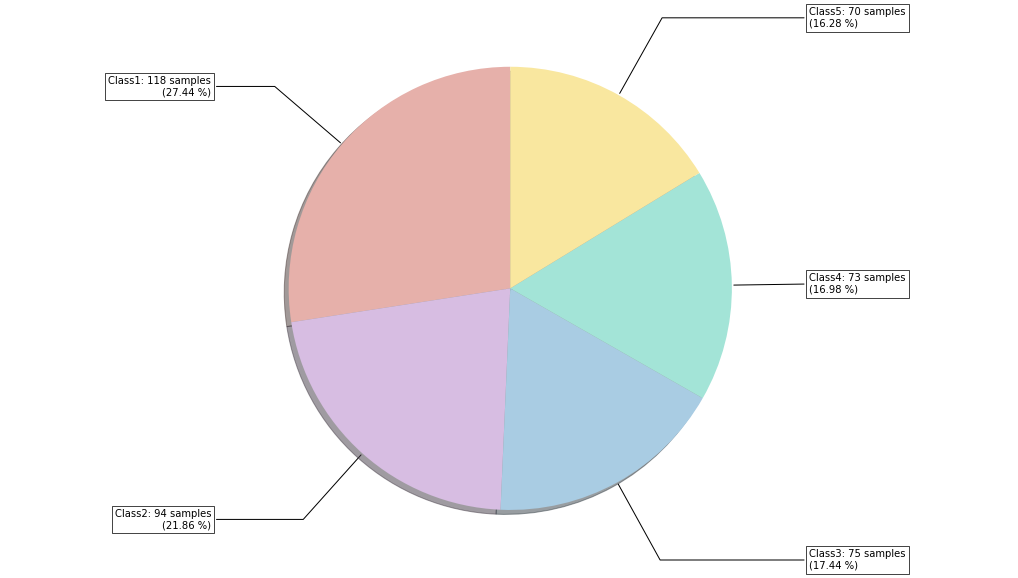

In [38]:
print("Rows, Columns:",data.shape)
Clases = data.groupby('Classes').size()
labels = Clases.index.values
sizes = Clases.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

Here we can see that class1 has 118 samples which is 27.44%,class2 has 94 samples which is 21.86%, class3 has 75 samples which is 17.44%,class4 has 73 samples which is 16.98%,class5 has 70 samples which is 16.28%,   

In [24]:
#Flow Pattern is the output class
#To know the count of each class:
data['Classes'].value_counts()

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64

In [39]:
#Missing values (in percent)
missing = (X.isnull().sum() / len(X)).sort_values(ascending = False)
missing = missing.index[missing > 0.5]
all_missing = list(set(missing))
print('There are %d columns with more than 50%% missing values' % len(all_missing))

There are 0 columns with more than 50% missing values


When performing this null value review process, none of the remaining characteristics has null or missing values that would allow us to eliminate them.
Removing zero-variance features
After performing the review of null values in the dataset, a cleaning of those characteristics that delivered zero in all samples, indicating zero variance, was performed, which in this case yielded 0 characteristics with this statistical behavior, so that data is not reduced, keep 5948 features.

In [40]:
#Separating independant variable and dependent variable("Flow Pattern")
X = data.drop(['Classes'], axis=1)
y = data['Classes']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(430, 5948)
(430,)


In [26]:
#Scaling X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)



# KNN Classification

In [9]:
#Apply KNN classifier.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
 
# Testing the model using X_test and storing the output in y_pred
y_pred_knn = knn.predict(X_test_scaled)
y_pred_knn

array(['Class1', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3',
       'Class2', 'Class3', 'Class1', 'Class3', 'Class2', 'Class3',
       'Class1', 'Class1', 'Class3', 'Class3', 'Class1', 'Class1',
       'Class2', 'Class3', 'Class3', 'Class4', 'Class4', 'Class3',
       'Class3', 'Class3', 'Class3', 'Class1', 'Class4', 'Class3',
       'Class3', 'Class1', 'Class3', 'Class5', 'Class3', 'Class1',
       'Class2', 'Class1', 'Class2', 'Class3', 'Class2', 'Class4',
       'Class5', 'Class3', 'Class2', 'Class3', 'Class4', 'Class4',
       'Class3', 'Class1', 'Class3', 'Class1', 'Class3', 'Class3',
       'Class2', 'Class2', 'Class2', 'Class4', 'Class3', 'Class3',
       'Class3', 'Class3', 'Class5', 'Class1', 'Class3', 'Class3',
       'Class5', 'Class2', 'Class1', 'Class1', 'Class1', 'Class5',
       'Class3', 'Class1', 'Class5', 'Class1', 'Class1', 'Class4',
       'Class5', 'Class3', 'Class3', 'Class5', 'Class3', 'Class3',
       'Class3', 'Class3', 'Class1', 'Class2', 'Class3', 'Clas

In [27]:
# Quantitative evaluation of the model quality on the test set. We will explain these metrics in detail at part c.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_knn))
score_knn = accuracy_score(y_test, y_pred_knn)
print("accuracy score: %0.3f" % score_knn)

#Creating a confusion matrix ,which compares the y_test and y_pred_knn
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

              precision    recall  f1-score   support

      Class1       1.00      0.82      0.90        40
      Class2       0.94      0.54      0.68        28
      Class3       0.34      1.00      0.51        21
      Class4       0.90      0.45      0.60        20
      Class5       0.89      0.40      0.55        20

    accuracy                           0.67       129
   macro avg       0.81      0.64      0.65       129
weighted avg       0.85      0.67      0.69       129

0.6666666666666666
accuracy score: 0.667


array([[33,  1,  5,  0,  1],
       [ 0, 15, 13,  0,  0],
       [ 0,  0, 21,  0,  0],
       [ 0,  0, 11,  9,  0],
       [ 0,  0, 11,  1,  8]])

Here we can see the accuracy is .67 in class1 vealues fitted well precision is 1, in class2 there is 1 unfitted value precision is .94, in class3 has the most unfitted values precision is .34 ,class4 has 1 unfited value precision is .90 and class5 has 1 unfitted value precision is .89 

KNN: 0.651075 (0.062286)


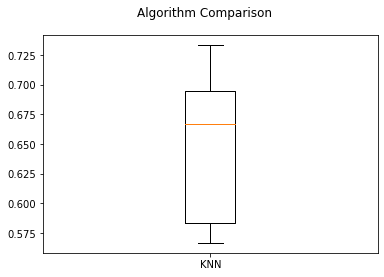

In [11]:
# We evaluate and compare accuracy levels 2 different algorithms (KNN vs. GaussianNB)
# Algorithms (KNN vs. GaussianNB)
from sklearn import model_selection

models = []
models.append(('KNN', KNeighborsClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# There is a population of accuracy measures for each algorithm (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see that k-nearest neighbors (KNN) algorithm has the larger accuracy score (compared to Naive Bayes algorithm).

# KNN Classification (applying parameters optimization)

In [28]:
# KNN Classification, apply Grid Search Parameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
parameters_k = {"n_neighbors": range(1, 20)}
gridsearch_knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_k, verbose=1, cv = 10, n_jobs=-1)
gridsearch_knn.fit(X_train_scaled, y_train)

print(gridsearch_knn.best_params_)
 
# Testing the model using X_test and storing the output in y_pred
y_pred_pknn = gridsearch_knn.predict(X_test_scaled)
y_pred_pknn

Fitting 10 folds for each of 19 candidates, totalling 190 fits
{'n_neighbors': 2}


array(['Class1', 'Class3', 'Class3', 'Class3', 'Class3', 'Class1',
       'Class2', 'Class3', 'Class1', 'Class3', 'Class2', 'Class3',
       'Class1', 'Class1', 'Class3', 'Class2', 'Class1', 'Class1',
       'Class2', 'Class3', 'Class3', 'Class3', 'Class4', 'Class3',
       'Class3', 'Class3', 'Class3', 'Class1', 'Class4', 'Class3',
       'Class4', 'Class3', 'Class3', 'Class5', 'Class3', 'Class1',
       'Class2', 'Class1', 'Class2', 'Class3', 'Class2', 'Class3',
       'Class5', 'Class3', 'Class2', 'Class3', 'Class4', 'Class4',
       'Class1', 'Class1', 'Class2', 'Class1', 'Class3', 'Class3',
       'Class2', 'Class2', 'Class2', 'Class4', 'Class3', 'Class2',
       'Class3', 'Class3', 'Class5', 'Class1', 'Class3', 'Class3',
       'Class5', 'Class2', 'Class1', 'Class1', 'Class1', 'Class5',
       'Class3', 'Class1', 'Class1', 'Class1', 'Class1', 'Class4',
       'Class4', 'Class2', 'Class3', 'Class5', 'Class3', 'Class3',
       'Class3', 'Class3', 'Class1', 'Class2', 'Class3', 'Clas

In [29]:
# Quantitative evaluation of the model quality on the test set. 
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_pknn))
score_pknn = accuracy_score(y_test, y_pred_pknn)
print("accuracy score: %0.3f" % score_pknn)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_pknn))

# Creating  a confusion matrix,which compares the y_test and y_pred_pknn
from sklearn.metrics import confusion_matrix
cm_pknn = confusion_matrix(y_test, y_pred_pknn)
cm_pknn

0.7131782945736435
accuracy score: 0.713
              precision    recall  f1-score   support

      Class1       0.97      0.82      0.89        40
      Class2       0.88      0.82      0.85        28
      Class3       0.40      1.00      0.57        21
      Class4       0.89      0.40      0.55        20
      Class5       1.00      0.35      0.52        20

    accuracy                           0.71       129
   macro avg       0.83      0.68      0.68       129
weighted avg       0.85      0.71      0.72       129



array([[33,  1,  5,  1,  0],
       [ 0, 23,  5,  0,  0],
       [ 0,  0, 21,  0,  0],
       [ 0,  0, 12,  8,  0],
       [ 1,  2, 10,  0,  7]])

Here we can see the accuracy is increased .71, in class1 there is 1 precision is .97, in class2 there is 3 unfitted value precision is .88, in class3 unfitted values decressed precision is incresed .40, class4 has 1 unfited value precision is .89 and class5 has 0 unfitted value precision increased 1 

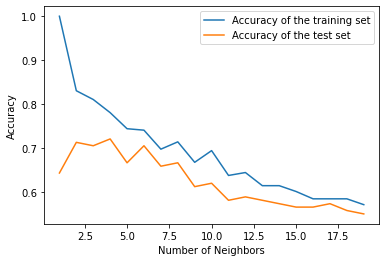

In [30]:
#Once again, we test the result from Grid Search Parameters by applying loop
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 50
neighbors_setting = range(1,20)

for k in neighbors_setting:
    knn_test = KNeighborsClassifier(n_neighbors= k)
    knn_test.fit(X_train_scaled,y_train)
    training_accuracy.append(knn_test.score(X_train_scaled, y_train))
    test_accuracy.append(knn_test.score(X_test_scaled, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()



by looking at plot, best result accurs when n_neighbors is 2. It is the same n_neighbors we got from Grid Search Parameters.

KNN: 0.664409 (0.096066)
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
Fitting 10 folds for each of 19 candidates, totalling 190 fits
KNN_parameter: 0.680968 (0.109962)


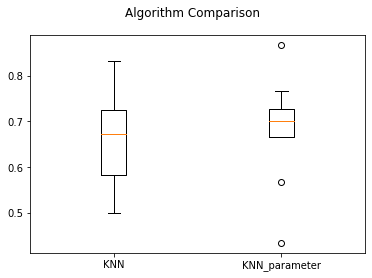

In [31]:
from sklearn import model_selection

models = []
models.append(('KNN',KNeighborsClassifier(3)))
models.append(('KNN_parameter', gridsearch_knn))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 10, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv = kfold, scoring= 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# There is a population of accuracy measures for each algorithm (10 fold cross validation).

# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()